# California House Price Prediction Model

In [18]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


### I. Preprocessing

In [2]:
# importing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
#divinding into 2 arrays 
df_x=pd.DataFrame(housing.data,columns=housing.feature_names)
df_y=pd.DataFrame(housing.target)

In [4]:
df_y.describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [17]:
df_y.isnull()

,0
0,False
1,False
2,False
3,False
4,False
...,...
20635,False
20636,False
20637,False
20638,False


In [5]:
df_x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


### II. Linear Regression

In [33]:
# Model selection 
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [34]:
# Data Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.33)

In [35]:
# Model fitting 
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
reg.coef_

array([[ 4.43381207e-01,  9.64854970e-03, -1.17724257e-01,
         7.81924100e-01, -2.72262810e-06, -3.60651006e-03,
        -4.32899219e-01, -4.45008488e-01]])

In [37]:
reg.intercept_

array([-37.91254381])

In [38]:
#Model Prection
y_pred=reg.predict(x_test)
y_pred

array([[2.08617094],
       [1.87872595],
       [4.8586512 ],
       ...,
       [2.3844498 ],
       [2.66341222],
       [0.60827708]])

In [39]:
#Actual Values
y_test

,0
221,1.51000
19667,1.35400
4045,5.00001
19216,2.44600
15214,2.63600
...,...
13035,2.93300
13273,2.43900
9291,1.79200
18476,4.36700


### III. Prediction

In [40]:
# Calculation pf error metrics
from sklearn.metrics import mean_squared_error,r2_score
print("MSE :" ,mean_squared_error(y_pred,y_test))
print("r2 Score:" ,r2_score(y_pred,y_test))


MSE : 0.5577577290261253
r2 Score: 0.3305487908014304


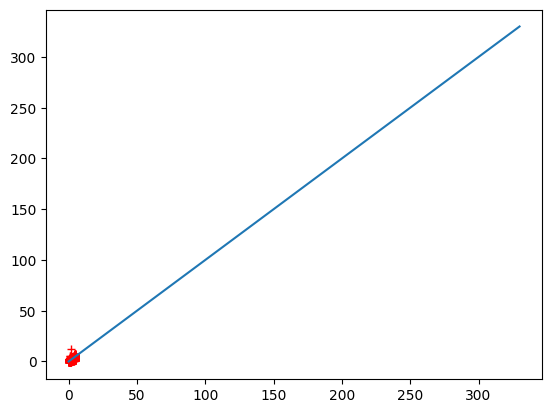

In [41]:
y_pred = reg.predict(x_test) 
plt.plot(y_test, y_pred, '+',color='red')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()